# Sartorious experiments data-plotting code

In [38]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '817'
folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Raw_Data")

df_cal = pd.read_csv(folder+r'/Viscosity_std_'+std+'.csv')

df_cal


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment
0,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,True,10,10,5,0.8466,108.032850,0.723399,-14.552447,Incomplete aspiration and dispense,No comment
1,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,False,10,10,0,0.8466,99.887378,0.662127,-21.789827,Incomplete aspiration and dispense,Blowout before
2,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,False,10,10,0,0.8466,99.965428,0.753080,-11.046492,Incomplete aspiration and dispense,No blowout before
3,Viscosity_std_817,rLine1000,500.0,54.163119,54.163119,False,10,10,0,0.8466,81.678808,0.377640,-10.786600,Incomplete aspiration and dispense,Blowout before
4,Viscosity_std_817,rLine1000,500.0,54.163119,54.163119,False,10,10,0,0.8466,81.593925,0.389385,-8.012128,Incomplete aspiration and dispense,No blowout before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Viscosity_std_817,rLine1000,300.0,10.000000,5.000000,False,10,10,0,0.8466,153.477849,0.243600,-4.086789,Complete Transfer,Blowout before
66,Viscosity_std_817,rLine1000,300.0,10.000000,5.000000,False,10,10,0,0.8466,153.610692,0.244198,-3.851567,Complete Transfer,No blowout before
67,Viscosity_std_817,rLine1000,500.0,10.000000,5.000000,False,10,10,0,0.8466,213.416266,0.407089,-3.829765,Complete Transfer,Blowout before
68,Viscosity_std_817,rLine1000,500.0,10.000000,5.000000,False,10,10,0,0.8466,213.356174,0.415686,-1.798824,Complete Transfer,No blowout before


In [39]:
# Calculate time for 1000ul
df_cal['time_for_1000'] = 1000/df_cal["aspiration_rate"] + 1000/df_cal["dispense_rate"] + df_cal["delay_aspirate"] + df_cal["delay_dispense"] + df_cal["delay_blow_out"]

# Getting unique values of time in a numpy array
TM = df_cal['time_for_1000'].unique()
TM

array([ 61.92549562,  56.92549562,  63.46274769,  65.        ,
        78.33333333, 103.33333333, 120.        , 136.66666667,
       170.        , 270.        , 286.66666667, 320.        ])

In [40]:
# Assigning iterations to each TM value and applying iterations to form a new column in df_cal
iteration = 1
iteration_dict = {}
iteration_list = []

for item in TM:
    iteration_dict[item] = iteration
    iteration += 1
# print(iteration_dict)

for value in df_cal['time_for_1000']:
    iteration_list.append(iteration_dict[value])
# print(iteration_list)

df_cal['iteration'] = iteration_list
df_cal

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,time_for_1000,iteration
0,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,True,10,10,5,0.8466,108.032850,0.723399,-14.552447,Incomplete aspiration and dispense,No comment,61.925496,1
1,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,False,10,10,0,0.8466,99.887378,0.662127,-21.789827,Incomplete aspiration and dispense,Blowout before,56.925496,2
2,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,False,10,10,0,0.8466,99.965428,0.753080,-11.046492,Incomplete aspiration and dispense,No blowout before,56.925496,2
3,Viscosity_std_817,rLine1000,500.0,54.163119,54.163119,False,10,10,0,0.8466,81.678808,0.377640,-10.786600,Incomplete aspiration and dispense,Blowout before,56.925496,2
4,Viscosity_std_817,rLine1000,500.0,54.163119,54.163119,False,10,10,0,0.8466,81.593925,0.389385,-8.012128,Incomplete aspiration and dispense,No blowout before,56.925496,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Viscosity_std_817,rLine1000,300.0,10.000000,5.000000,False,10,10,0,0.8466,153.477849,0.243600,-4.086789,Complete Transfer,Blowout before,320.000000,12
66,Viscosity_std_817,rLine1000,300.0,10.000000,5.000000,False,10,10,0,0.8466,153.610692,0.244198,-3.851567,Complete Transfer,No blowout before,320.000000,12
67,Viscosity_std_817,rLine1000,500.0,10.000000,5.000000,False,10,10,0,0.8466,213.416266,0.407089,-3.829765,Complete Transfer,Blowout before,320.000000,12
68,Viscosity_std_817,rLine1000,500.0,10.000000,5.000000,False,10,10,0,0.8466,213.356174,0.415686,-1.798824,Complete Transfer,No blowout before,320.000000,12


#### Making a scatterplot

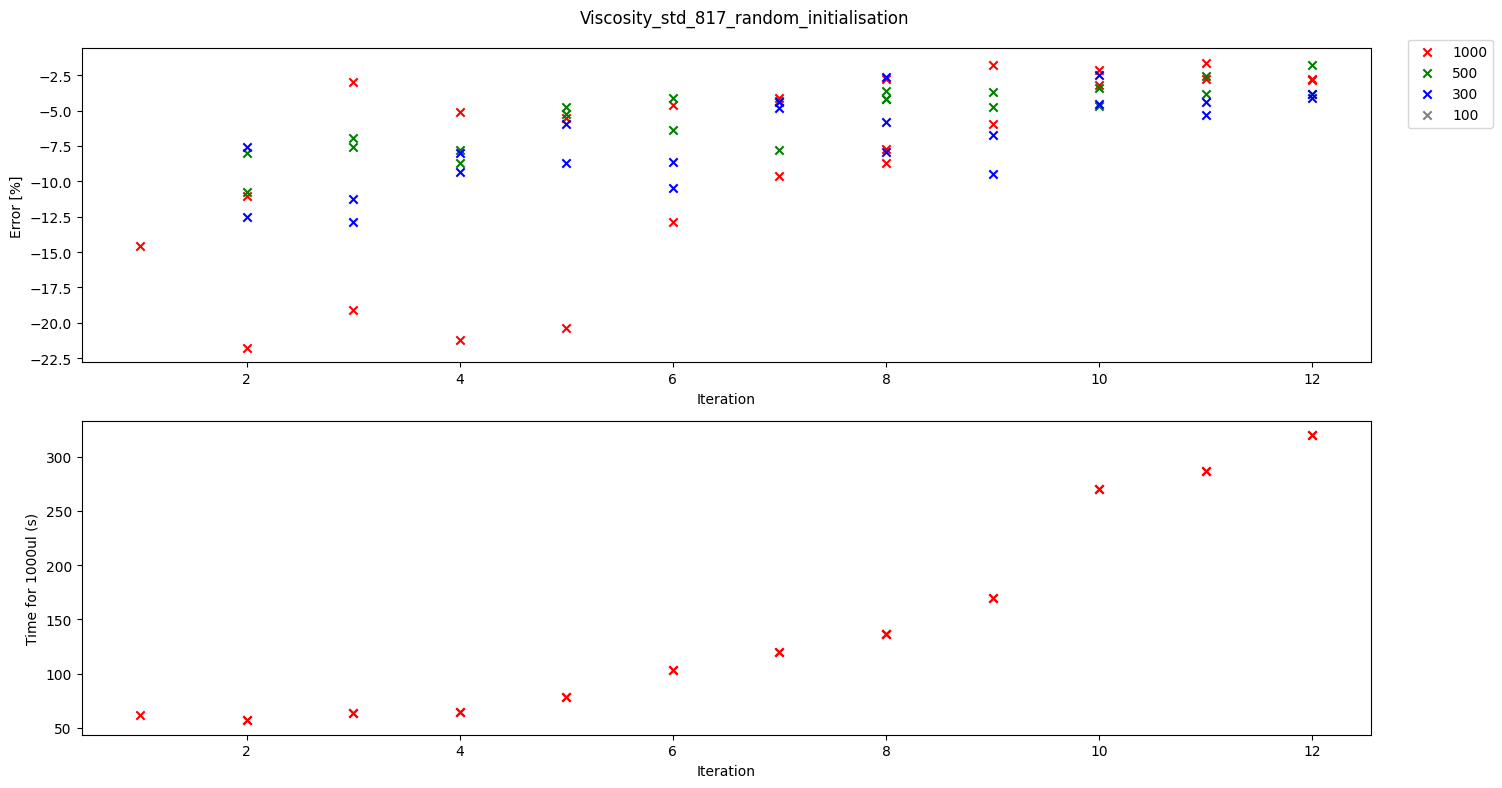

In [44]:
# Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_100['iteration'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()



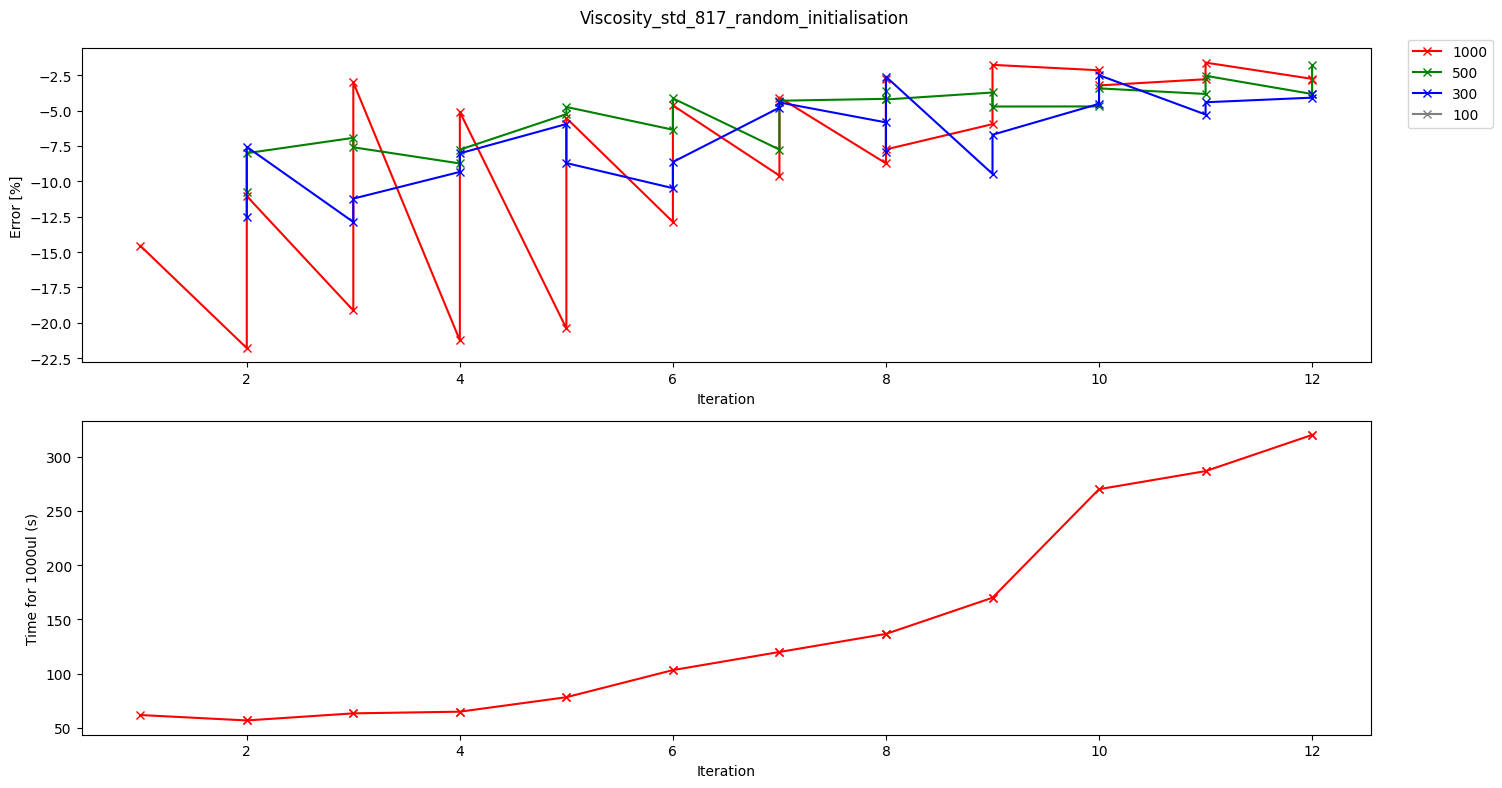

In [45]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].plot(df_cal_100['iteration'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()